## time series Analysis
Stock prices for AAPL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

In [6]:
#Import datareader library to get data from yahoo.com
#mention stock name in symbols
import pandas_datareader as pdr
from datetime import datetime

aapl= pdr.get_data_yahoo(symbols='AAPL', start=datetime(2010, 1, 1), end=datetime(2017, 8, 8))
print(aapl['Adj Close'])

Date
2010-01-04     27.505054
2010-01-05     27.552608
2010-01-06     27.114347
2010-01-07     27.064222
2010-01-08     27.244156
2010-01-11     27.003820
2010-01-12     26.696650
2010-01-13     27.073221
2010-01-14     26.916422
2010-01-15     26.466595
2010-01-19     27.637430
2010-01-20     27.212029
2010-01-21     26.741631
2010-01-22     25.415281
2010-01-25     26.099028
2010-01-26     26.467880
2010-01-27     26.717218
2010-01-28     25.613209
2010-01-29     24.683992
2010-02-01     25.027143
2010-02-02     25.172379
2010-02-03     25.605494
2010-02-04     24.682707
2010-02-05     25.120964
2010-02-08     24.948748
2010-02-09     25.214790
2010-02-10     25.077271
2010-02-11     25.533520
2010-02-12     25.753294
2010-02-16     26.141434
                 ...    
2017-06-27    143.167786
2017-06-28    145.259567
2017-06-29    143.117966
2017-06-30    143.456650
2017-07-03    142.938690
2017-07-05    143.526367
2017-07-06    142.171692
2017-07-07    143.616013
2017-07-10    144.49

In [7]:
#get data types of all variables
aapl.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
#datetime is taken as index. 
aapl.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1913, freq=None)

In [9]:
#describe is good for summarizing numerical variables
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1.913000e+03
mean,84.325136,85.050119,83.534982,84.314630,79.631315,8.888340e+07
std,32.082242,32.289205,31.882396,32.096268,32.697403,6.067795e+07
min,27.481428,28.000000,27.178572,27.435715,24.682707,1.147590e+07
25%,57.098572,57.520000,56.318573,56.935715,51.374222,4.339550e+07
50%,82.705711,83.750000,81.732857,82.902855,75.230835,7.492730e+07
75%,110.000000,111.110001,108.830002,109.830002,106.491547,1.157093e+08
max,159.279999,161.830002,158.270004,160.080002,159.453827,4.702495e+08


In [10]:
#subsetting dataframe
df=aapl['Adj Close']

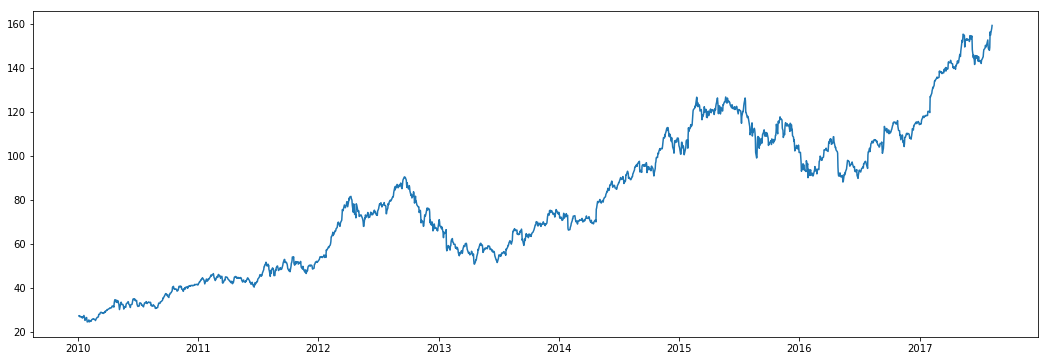

In [11]:
plt.plot(df)

In [12]:
#defining a function to check stationarity of a timeseries using dickey-fuller test.
from statsmodels.tsa.stattools import adfuller
def check_stationarity(x):
    
    #Determing rolling statistics
    #rolmean1=df.rolling(x,window=12, center=False).std
    rolmean=x.rolling(window=30,center=False).mean()
    rolstd=x.rolling(window=30,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


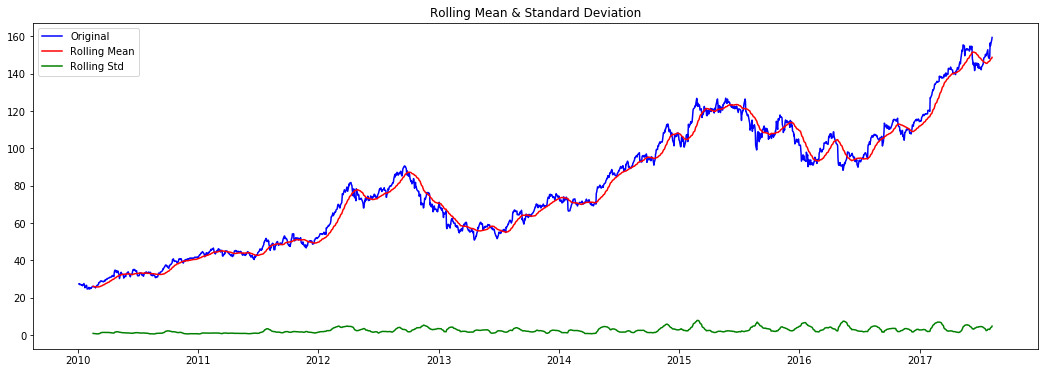

Results of Dickey-Fuller Test:
Test Statistic                    0.137737
p-value                           0.968545
#Lags Used                        0.000000
Number of Observations Used    1912.000000
Critical Value (1%)              -3.433775
Critical Value (5%)              -2.863053
Critical Value (10%)             -2.567575
dtype: float64


In [13]:
check_stationarity(df)

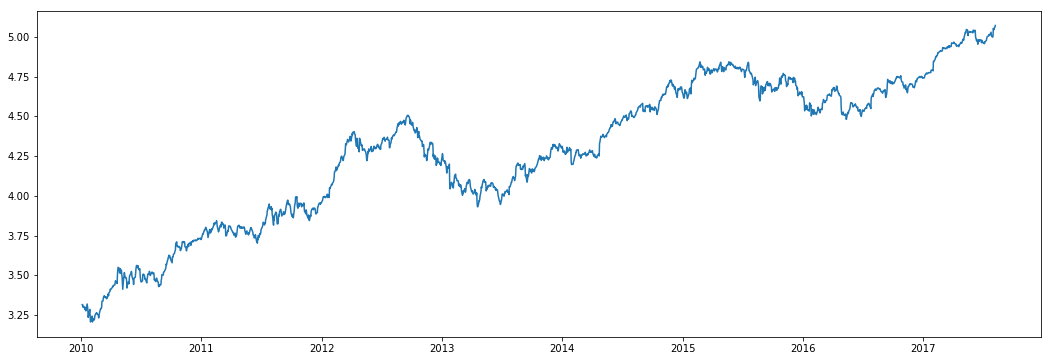

In [14]:
#Transforming series (column) to reduce trend
df_lg=np.log(df)
plt.plot(df_lg)

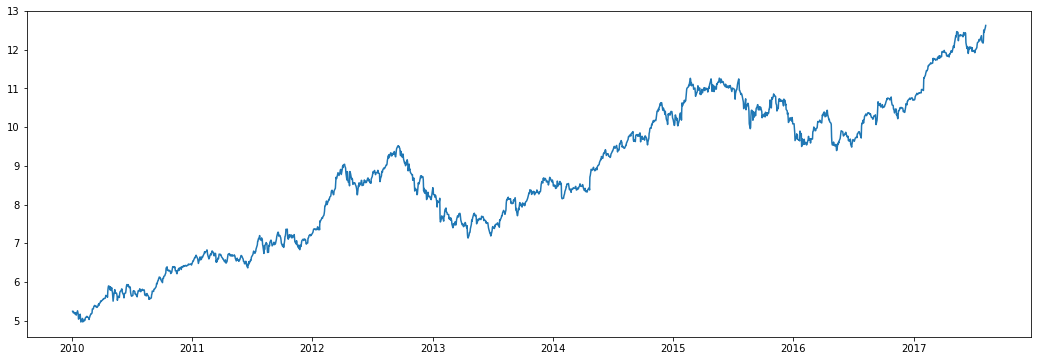

In [15]:
#Trying another transformation to reduce trend
df_sqrt=np.sqrt(df)
plt.plot(df_sqrt)

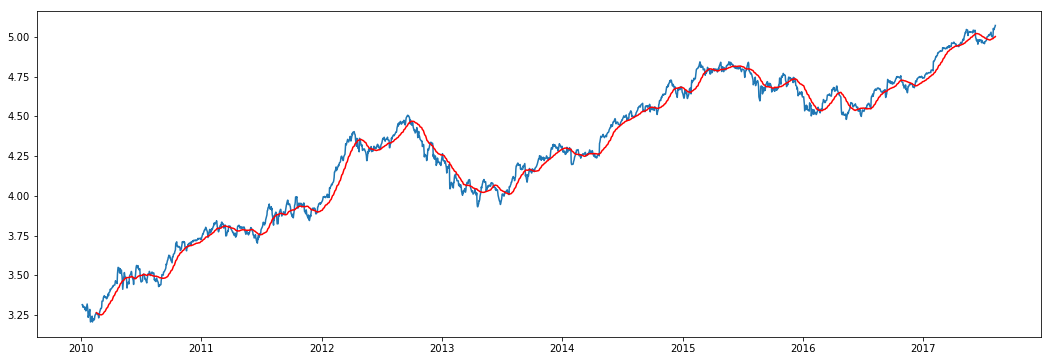

In [16]:
#window defines number of rows taken for calculating rolling average. 
rol_avg=df_lg.rolling(window=30,center=False).mean()
plt.plot(df_lg)
plt.plot(rol_avg,color='red')

###### the graph shows the timeseries has started smoothing. Moving average can be used as it gives us a good approximation of trend. Also depending on the number of rows you can generalize the fit. Thus, preventing overfitting. 

In [17]:
#taking the difference to make the series stationary
df_lg_mov_avg_price_diff=df_lg-rol_avg
df_lg_mov_avg_price_diff.head(31)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12         NaN
2010-01-13         NaN
2010-01-14         NaN
2010-01-15         NaN
2010-01-19         NaN
2010-01-20         NaN
2010-01-21         NaN
2010-01-22         NaN
2010-01-25         NaN
2010-01-26         NaN
2010-01-27         NaN
2010-01-28         NaN
2010-01-29         NaN
2010-02-01         NaN
2010-02-02         NaN
2010-02-03         NaN
2010-02-04         NaN
2010-02-05         NaN
2010-02-08         NaN
2010-02-09         NaN
2010-02-10         NaN
2010-02-11         NaN
2010-02-12         NaN
2010-02-16   -0.000968
2010-02-17   -0.003321
Name: Adj Close, dtype: float64

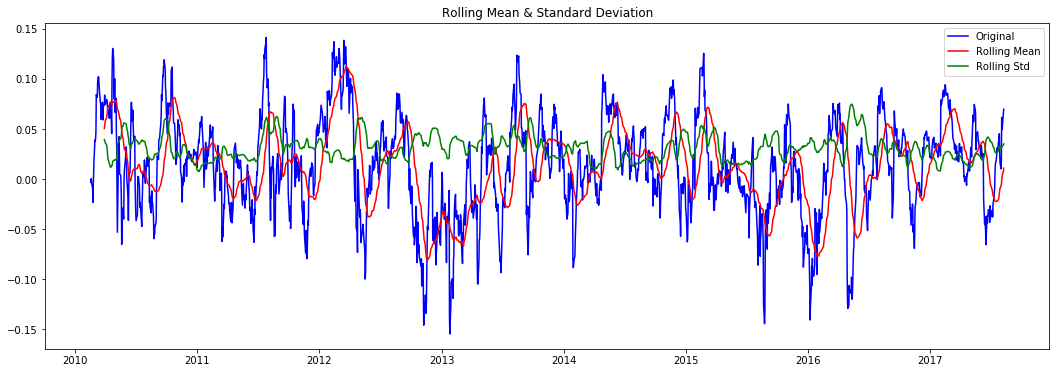

Results of Dickey-Fuller Test:
Test Statistic                -7.292725e+00
p-value                        1.403472e-10
#Lags Used                     1.400000e+01
Number of Observations Used    1.869000e+03
Critical Value (1%)           -3.433854e+00
Critical Value (5%)           -2.863088e+00
Critical Value (10%)          -2.567594e+00
dtype: float64


In [18]:
#dropping null values so prevent getting an error
df_lg_mov_avg_price_diff.dropna(inplace=True)
check_stationarity(df_lg_mov_avg_price_diff)

###### This method is good for future trend approximation, but does not value recent data points much. For stock market recent events could play a big factor. Next cell contains a solution.

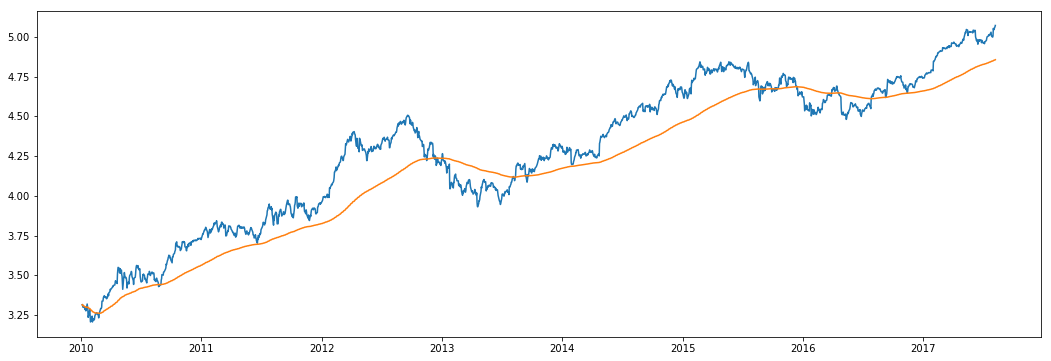

In [19]:
#exponential weighted moving Average. It gives more weight to recent datapoints.
#change the value of halflife to fit the exp_mov_avg line. 
exp_mov_avg=df_lg.ewm(halflife=100,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(df_lg)
plt.plot(exp_mov_avg)

In [20]:
exp_mov_avg_diff=df_lg-exp_mov_avg


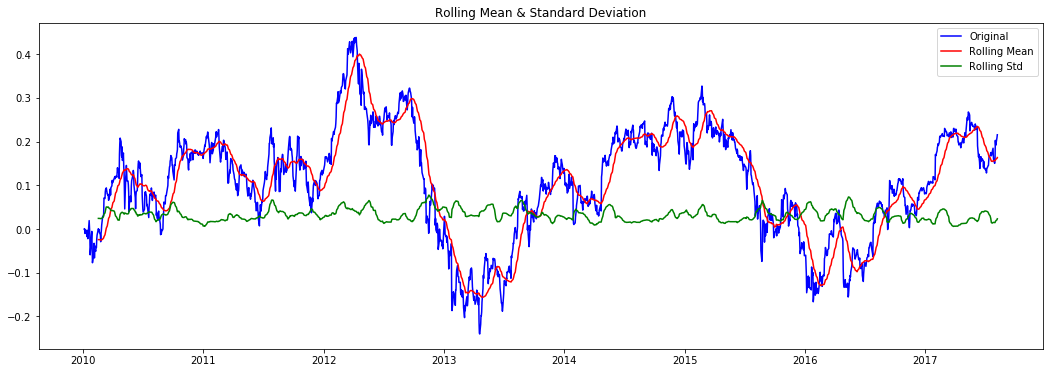

Results of Dickey-Fuller Test:
Test Statistic                   -2.864632
p-value                           0.049618
#Lags Used                        0.000000
Number of Observations Used    1912.000000
Critical Value (1%)              -3.433775
Critical Value (5%)              -2.863053
Critical Value (10%)             -2.567575
dtype: float64


In [21]:
check_stationarity(exp_mov_avg_diff)

#### Now we have a good idea how to solve trend. Next, seasonality comes in picture now

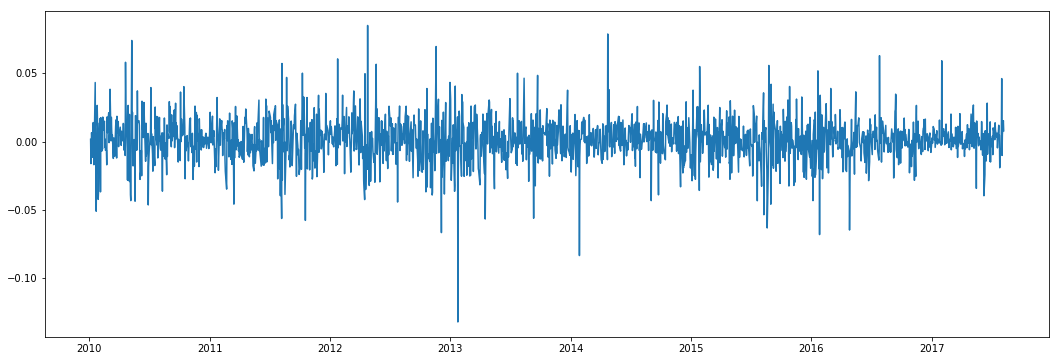

In [22]:
#Differencing. Subtracting one data point with previous datapoint. Timelag. 
df_lg_diff=df_lg-df_lg.shift()
plt.plot(df_lg_diff)

###### Differencing reduces trend considerably

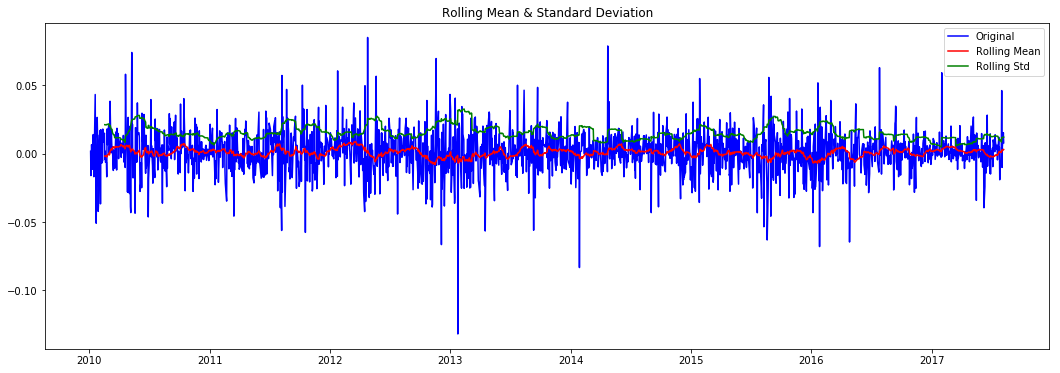

Results of Dickey-Fuller Test:
Test Statistic                  -42.751174
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1911.000000
Critical Value (1%)              -3.433777
Critical Value (5%)              -2.863054
Critical Value (10%)             -2.567576
dtype: float64


In [23]:
#remove Null values to prevent from getting an error
df_lg_diff.dropna(inplace=True)
check_stationarity(df_lg_diff)

## AR & MA TimeSeries modelling

In [34]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


acf = acf(df_lg_diff, nlags=10)
pacf = pacf(df_lg_diff, nlags=10, method='ols')


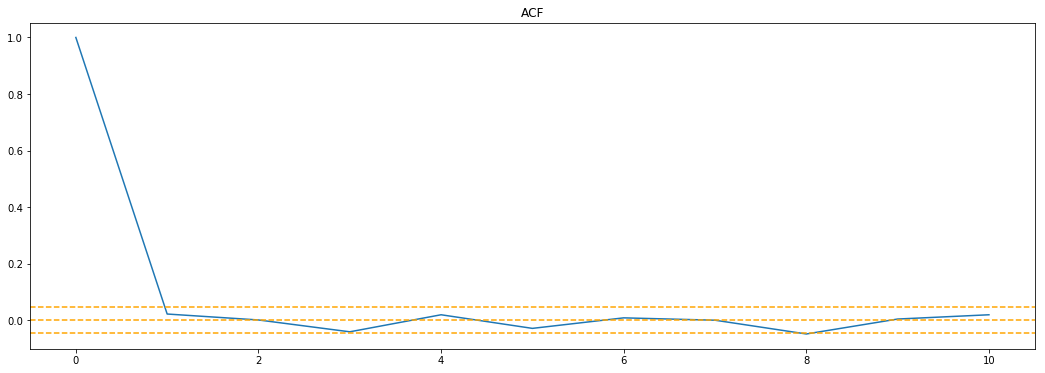

In [35]:
#ACF plot:  
plt.plot(acf)
plt.axhline(y=0,linestyle='--',color='orange')
plt.axhline(y=-1.96/np.sqrt(len(df_lg_diff)),linestyle='--',color='orange')
plt.axhline(y=1.96/np.sqrt(len(df_lg_diff)),linestyle='--',color='orange')
plt.title('ACF')

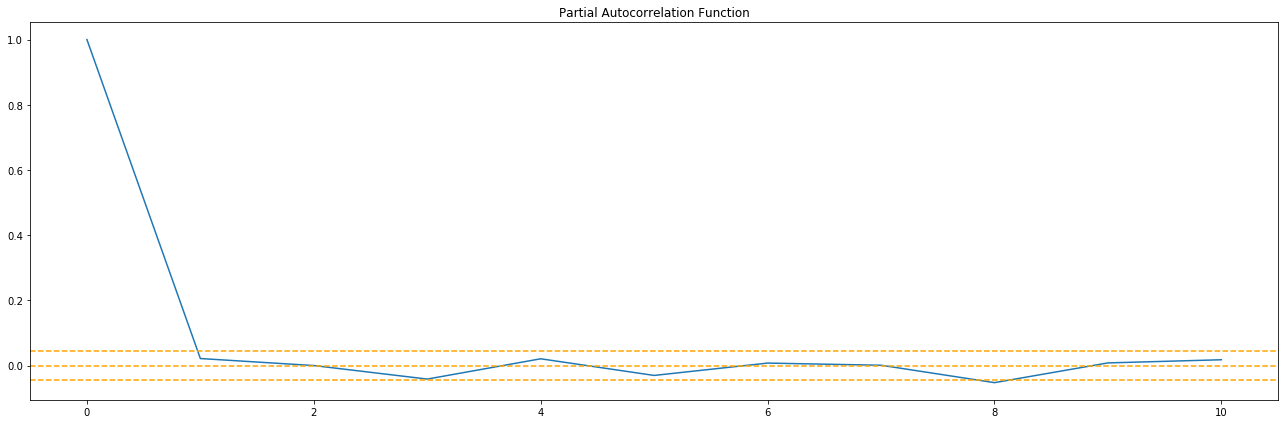

In [36]:
#PACF
#Plot PACF:
plt.plot(pacf)
plt.axhline(y=0,linestyle='--',color='orange')
plt.axhline(y=-1.96/np.sqrt(len(df_lg_diff)),linestyle='--',color='orange')
plt.axhline(y=1.96/np.sqrt(len(df_lg_diff)),linestyle='--',color='orange')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

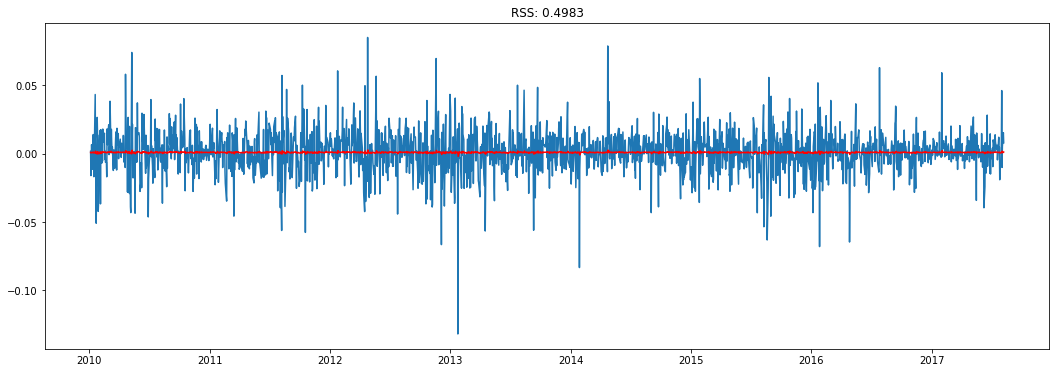

In [43]:
#AR model

model = ARIMA(df_lg, order=(2,1,0))  
AR = model.fit(disp=-1)  
plt.plot(df_lg_diff)
plt.plot(AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((AR.fittedvalues-df_lg_diff)**2))

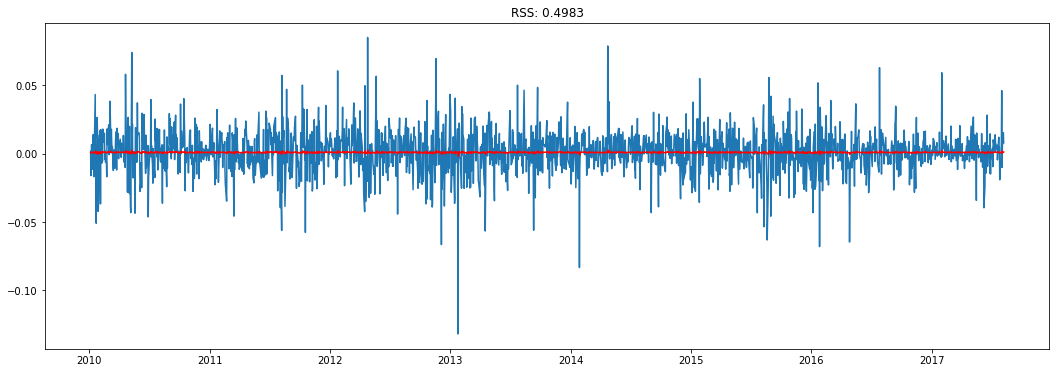

In [45]:
#MA Model
model = ARIMA(df_lg, order=(0, 1, 1))  
MA = model.fit(disp=-1)  
plt.plot(df_lg_diff)
plt.plot(MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((MA.fittedvalues-df_lg_diff)**2))

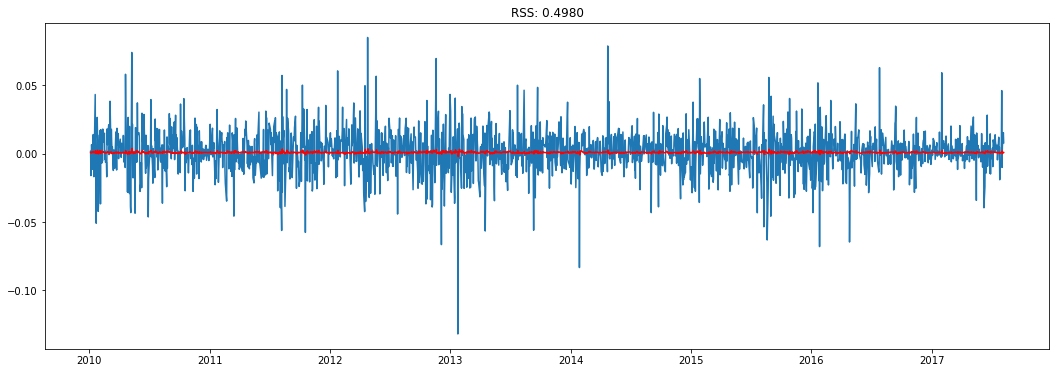

In [46]:
#ARIMA Model
model = ARIMA(df_lg, order=(2, 1, 1))  
ARIMA = model.fit(disp=-1)  
plt.plot(df_lg_diff)
plt.plot(ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((ARIMA.fittedvalues-df_lg_diff)**2))